In [252]:
import pandas as pd
import numpy as np

In [253]:
data = pd.read_csv('car.csv')

In [254]:
data.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [255]:
data.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

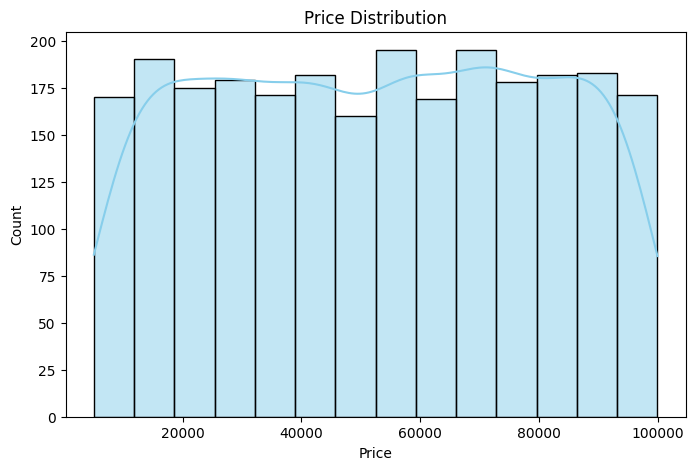

In [256]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.histplot(data['Price'], kde=True, color='skyblue')
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


## Pre-Processing

### Handle Missing Values

In [257]:
data['Year'] =  data['Year'].fillna(data['Year'].mean())
data['Brand'] = data['Brand'].fillna(data['Brand'].mode()[0])
data['Engine Size'] = data['Engine Size'].fillna(data['Engine Size'].mean())
data['Fuel Type'] = data['Fuel Type'].fillna(data['Fuel Type'].mode()[0])
data['Transmission'] = data['Transmission'].fillna(data['Transmission'].mode()[0])
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].mean())
data['Price'] = data['Price'].fillna(data['Price'].mean())
data['Model'] = data['Model'].fillna(data['Model'].mode()[0])

_________

### Dropping Duplicates

In [258]:
data.drop_duplicates(inplace=True)

In [259]:
data.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


#### Convert target column to binary

##### Encode Categorical Features

In [260]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [261]:
categorical_cols = [ 'Transmission', 'Fuel Type', 'Condition','Brand','Model']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)


#### Drop un nececeasary coloiujmn

In [262]:
data.drop(['Car ID'], axis=1, inplace=True)

In [263]:
data.head()

,Year,Engine Size,Mileage,Price,Transmission_Manual,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Condition_New,Condition_Used,...,Model_Model S,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,2016,2.3,114832,26613.92,True,False,False,True,True,False,...,False,True,False,False,False,False,False,False,False,False
1,2018,4.4,143190,14679.61,True,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2013,4.5,181601,44402.61,True,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,2011,4.1,68682,86374.33,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,2009,2.6,223009,73577.10,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


_________

## TEST - TRAIN SPLIT

In [264]:
from sklearn.model_selection import train_test_split

In [265]:
X = data.drop('Price', axis=1)
y = data['Price']

In [266]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [267]:
print("X_train Shape:  ", X_train.shape)
print("y_train Shape:  ", y_train.shape)
print("X_test Shape:  ", X_test.shape)
print("y_test Shape:  ", y_test.shape)

X_train Shape:   (1750, 42)
y_train Shape:   (1750,)
X_test Shape:   (750, 42)
y_test Shape:   (750,)


___________

#### Scaling Data

In [268]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [269]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [270]:
X.head()

,Year,Engine Size,Mileage,Transmission_Manual,Fuel Type_Electric,Fuel Type_Hybrid,Fuel Type_Petrol,Condition_New,Condition_Used,Brand_BMW,...,Model_Model S,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,2016,2.3,114832,True,False,False,True,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2018,4.4,143190,True,True,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,2013,4.5,181601,True,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2011,4.1,68682,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2009,2.6,223009,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [271]:
y.head()

0    26613.92
1    14679.61
2    44402.61
3    86374.33
4    73577.10
Name: Price, dtype: float64

# Model Training

______

        Call Model

In [272]:
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)

        Train Model

In [273]:
lr.fit(X_train, y_train)

LinearRegression()

    Predict

In [274]:
y_pred_lr = lr.predict(X_test)

In [275]:
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
lr_score = lr.score(X_test, y_test)

In [276]:
print("Linear Regression ")
print("______")
print ("Linear Regression Accuracy: ", lr_score* 100, "%")
print("Linear Regression R^2: ", r2_lr)
print("Linear Regression MSE: ", mse_lr)

Linear Regression 
______
Linear Regression Accuracy:  -2.273882673300376 %
Linear Regression R^2:  -0.02273882673300376
Linear Regression MSE:  774429251.7619303


____________

## DECISION TREE

In [277]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [278]:
y_pred_dt = dt.predict(X_test)

In [279]:
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
dt_score = dt.score(X_test, y_test)

In [281]:
print("DecisionTree Regrssion")
print("_______")
print ("Decision Tree Regression Accuracy: ", dt_score* 100, "%")
print("Decision Tree  Regression R^2: ", r2_dt)
print("Decision Tree  Regression MSE: ", mse_dt)

DecisionTree Regrssion
_______
Decision Tree Regression Accuracy:  -88.70311745082549 %
Decision Tree  Regression R^2:  -0.8870311745082549
Decision Tree  Regression MSE:  1428881061.6430917


______________

### Making Predictions

In [239]:
print("Predicting for sample: ", X_test[0])
print("Real Value: ", y_test.iloc[0])
print("Decision Tree Prediction: ", dt.predict([X_test[0]])[0])
print("Linear Regression Prediction: ", lr.predict([X_test[0]])[0])

Predicting for sample:  [-0.23533818 -0.32710787  0.70579359  0.9476538  -0.55226468 -0.56987189
 -0.58042949 -0.68509378 -0.72965697 -0.42149513 -0.40443025  2.53283522
 -0.41772795 -0.3909382  -0.42524899 -0.20106731 -0.20106731 -0.19483241
 -0.18679025 -0.20412415 -0.19324699 -0.19165035 -0.1749979  -0.21453462
 -0.19952409 -0.19165035 -0.21012554  5.21783542 -0.1749979  -0.19640689
 -0.18514578 -0.18181818 -0.1749979  -0.19483241 -0.18842229 -0.18514578
 -0.19483241 -0.16245911 -0.19952409 -0.19640689 -0.19952409 -0.18842229]
Real Value:  17494.9
Decision Tree Prediction:  80975.36
Linear Regression Prediction:  55189.7474657625
